# Class Activity 5 [20 minutes]: Quiz

1. List the assumptions implied by the ***multiple linear regression model*** specification

   $$y_i \sim \mathcal N(\mathbf{x}_i^\top \boldsymbol \beta,\sigma^2), i=1,\cdots,n$$

2. Rewrite the above expression as a single sample from a ***multivariate normal distribiution*** using the ***multivariate random variable*** $\mathbf{y}_{n\times 1}$, ***design matrix*** $X_{n\times p}$, and ***parameters*** $\boldsymbol \beta_{p \times 1}$ and $\boldsymbol \Sigma_{n \times n} = \sigma^2 I_{n \times n}$ (and include all the dimensions in your expression)

3. Write down the mathematical expression of the pdf of the above ***multivariate normal distribution*** in terms of $\boldsymbol \Sigma_{n \times n}$ (instead of $\sigma^2 I_{n \times n}$) ***multiple linear regression model*** specification considered thus far (and feel free to look up the expression of the pdf online if you need to)

4. What family of ***priors*** would be ***conjugate*** for the ***multivariate parameter*** $\boldsymbol \beta$?

5. What mathmematical form would a ***conjugate prior*** for $\boldsymbol  \Sigma$ be proporitional to for the ***multiple linear regression model*** currently under consideration? 

   Hint: 

   $$(\mathbf {y} -\mathbf{X \boldsymbol \beta})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf {y} - \mathbf{X\boldsymbol \beta}) = \textrm{tr}\left((\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf {y} - \mathbf{X\boldsymbol \beta}) \right) = \textrm{tr}\left((\mathbf {y} - \mathbf{X\boldsymbol \beta})(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top{\boldsymbol {\Sigma }}^{-1} \right)$$


# Class Activity 5 [10 minutes]: Review

1. Assumptions of ***Muliple Linear Regression***
    1. indepedendent
    2. homoskedastic 
    3. normally distributed residuals
    4. linear form and $\mathbf{x_i}$ having no randomness (measured without error)

2. ***Multivariate Normal Distribution*** specification of muliple linear regression

   $$\mathbf{y}_{n\times 1} \sim \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1},\boldsymbol \Sigma_{n\times n} = \sigma^2I_{n\times n})$$

3. For ***positive definite*** $\Sigma$

   $$p(\textbf{y}_{n\times 1}) = (2\pi )^{-n/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) $$

4. The ***conjugate prior*** for $\boldsymbol \beta$ would be $\boldsymbol \beta \sim \mathcal{MVN}(\boldsymbol \beta_0, \boldsymbol\Sigma_\beta)$ 

5. A ***conjugate prior*** for $\boldsymbol \Sigma$ would be $p(\boldsymbol \Sigma) \propto \det({\boldsymbol {\Sigma }})^{-v/2} \exp \left(-{\frac {1}{2}}\textrm{tr}\left(\Psi{\boldsymbol {\Sigma }}^{-1} \right)\right)$ 

   an [Inverse-Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) and it is ***conjugate*** since [determinants multiply](https://proofwiki.org/wiki/Determinant_of_Matrix_Product) and [traces add](https://proofwiki.org/wiki/Trace_of_Sum_of_Matrices_is_Sum_of_Traces#:~:text=let%20A%2BB%20denote%20the,denotes%20the%20trace%20of%20A.)

# Bayesian Multiple Linear Regression [10 minutes]


\begin{align*}\require{cancel}
\mathbf{y}_{n\times 1} \sim {} & \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1},\boldsymbol \Sigma_{n\times n} = \sigma^2I_{n\times n})\\
p(\mathbf{y}|\boldsymbol \beta, \sigma, \mathbf{X}) = {}& (2\pi )^{-n/2}\cancel{\det({\boldsymbol {\Sigma }})^{-1/2}}{\frac{1}{\sigma^{\frac{n}{2}}}}\exp \left(-{\frac {1}{2\sigma^2}}(\mathbf {y} -\mathbf{X\boldsymbol\beta})^\top\cancel{\boldsymbol {\Sigma }^{-1}}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)\\\\
\boldsymbol\beta \sim {} & \mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta) \quad or\;?\\\\
\sigma \sim {} & exponential(\lambda)  \quad p(\sigma) =  \lambda e^{-\lambda \sigma}1_{[0,\infty]}(\sigma)\\\\
\end{align*}
$$or \quad \sigma \sim \text{HalfNormal}(\mu_\sigma,\sigma_\sigma), \sigma \sim  \text{InverseGamma}(\alpha,\beta), \sigma \sim \text{TruncatedNormal}(\mu_\sigma,\sigma_\sigma,a,b) \quad or \; ?$$


In [24]:
import pymc as pm; import numpy as np; n,p=100,10; X,y=np.zeros((n,p)),np.ones((n,1))
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)
    # y = pm.MvNormal('y', mu=pm.math.dot(X, betas), cov=sigma**2*np.eye(n), shape=(n,1), observed=y)
    
with MLR:
    idata = pm.sample()

# Homework 5: Part I

1. Go get data from kaggle.com and do a ***Bayesian Multiple Linear Regression*** analysis

```python
import pymc as pm; import numpy as np
n,p=100,10; X,y=np.zeros((n,p)),np.ones((n,1))
# Replace this made up data with your data set from kaggle...
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()
```    

2. Choose ***priors*** that work: certainly you'll likely need to change the ***hyperparameters***, and perhaps you can experiment with different distributional families for `sigma`...

3. [Optional] Assess the performance of the MCMC and note any issue

    1. Traceplots, inference (credible) intervals, effective sample sizes, energy plots, warnings and other notes... just the usual stuff they do [here](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview)

4. [Optional] Perform model Multiple Linear Regression diagnostics... residual plots, etc.


# Bayesian Multiple Linear Regression? [10 minutes]

\begin{align*}\require{cancel}
\mathbf{y}_{n\times 1} \sim {} & \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1},\boldsymbol \Sigma_{n\times n} = \sigma^2I_{n\times n})\\
p(\mathbf{y}|\boldsymbol \beta, \sigma, \mathbf{X}) = {}& (2\pi )^{-n/2}\cancel{\det({\boldsymbol {\Sigma }})^{-1/2}}{\frac{1}{\sigma^{\frac{n}{2}}}}\exp \left(-{\frac {1}{2\sigma^2}}(\mathbf {y} -\mathbf{X\boldsymbol\beta})^\top\cancel{\boldsymbol {\Sigma }^{-1}}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)\\\\\hline\\
\mathbf{y}_{n\times 1} \sim {} & \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1},\boldsymbol \Sigma_{n\times n} \cancel{= \sigma^2I_{n\times n}})\\
p(\mathbf{y}|\boldsymbol \beta, \sigma, \mathbf{X}) = {}& (2\pi )^{-n/2}{\det({\boldsymbol {\Sigma }})^{-1/2}}\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol\beta})^\top{\boldsymbol {\Sigma }^{-1}}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)\\\\
\boldsymbol\beta \sim {} & \mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta) \quad or\;?\\\\
p(\boldsymbol \Sigma) \propto {} & \det({\boldsymbol {\Sigma }})^{-v/2} \exp \left(-{\frac {1}{2}}\textrm{tr}\left(\Psi{\boldsymbol {\Sigma }}^{-1} \right)\right) \quad or\;?
\end{align*}

## Do we forsee any problems with what we're going to do here?

# Conjugate Multivariate Normal Priors [15 minutes]

\begin{align*}
p(\mathbf{y} | \boldsymbol \beta, \boldsymbol \Sigma, \mathbf{X})= {}& (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf{y} - \mathbf{X\beta})\right)\\
\propto{}& \exp\left(\mathbf{\beta}^\top\mathbf{X}^\top\boldsymbol\Sigma^{-1}\mathbf{y} - \frac{1}{2}\mathbf{\beta}^\top \mathbf{X}^\top \boldsymbol\Sigma^{-1} \mathbf{X\beta} \right)\\
\propto{}& \exp\left( - \frac{1}{2} \left((\mathbf{X}^\top \boldsymbol\Sigma^{-1} \mathbf{X})^{-1}\mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} -\beta\right)^{\!\top} \left[\mathbf{X}^{\top} \boldsymbol\Sigma^{-1} \mathbf{X} \right]\left((\mathbf{X}^\top \boldsymbol\Sigma^{-1} \mathbf{X})^{-1}\mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} -\beta\right)  \right)\\
p(\boldsymbol \beta) \propto 1 \Longrightarrow {}& p(\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = \mathcal{MVN}\left(E[\boldsymbol \beta] = (\mathbf{X}^\top \boldsymbol\Sigma^{-1} \mathbf{X})^{-1}\mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y}, \text{Var}[\boldsymbol \beta] = \left[\mathbf{X}^{\top} \boldsymbol\Sigma^{-1} \mathbf{X} \right]^{-1} \right)\\
or \quad {}& \text{to use a conjugate family of priors...}\\
p(\boldsymbol \beta) = {}& \mathcal{MVN}\left(E[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \boldsymbol \beta_0, \text{Var}[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \boldsymbol \Sigma_\beta \right) \quad \text{ so}\\
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(E[\boldsymbol \beta] = \text{Var}[\boldsymbol \beta]\bigg( \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Var}[\boldsymbol \beta] = \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X} \right]^{-1} + \boldsymbol \Sigma_\beta^{-1} \bigg)\\
\end{align*}


\begin{align*}
\text{Look familiar?}&\, \Downarrow{} \quad\quad \underbrace{\;\,\textbf{mean}\,\;}\quad\;\underbrace{\textbf{precision}}\\
p(\theta|x,\theta_0,\tau, \phi) &={} \text{N}\left(\frac{\left(\tau \theta_0+\phi\sum_{i=1}^{n}x_{i}\right)}{(\tau+n\phi)}, \tau+n\phi \right)
\end{align*}



# Homework 5: Part II
    
## Answer the following with respect to $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ on the previous slide
    
1. Rewrite $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ in terms of $\sigma^2$ (no longer using $\Sigma$) if $\Sigma=\sigma^2I$

2. What is $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

3. What ***hyperparameters*** values (legal or illegal) would make $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (X^\top X)^{-1} X^\top y$?

4. What ***hyperparameters*** values (legal or illegal) would make $E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = X(X^\top X)^{-1} X^\top y$?

5. What is $\text{Var}[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

# Inverse-Wishart Conjugate Priors for $\Sigma$ [15 minutes]

\begin{align*}
p(\mathbf{y} | \boldsymbol \beta, \Sigma, \mathbf{X}) = {}& (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf{y} - \mathbf{X\beta})\right)\\
= {}& (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}} \textrm{tr}\big((\mathbf {y} -\mathbf{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf{y} - \mathbf{X\beta})\big)\right)\\
= {}& (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}} \textrm{tr}\big((\mathbf{y} - \mathbf{X\beta})(\mathbf {y} -\mathbf{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}\big)\right)\\
p(\boldsymbol \Sigma) \propto 1 \Longrightarrow {}& 
\boldsymbol \Sigma | \boldsymbol \beta, \mathbf{X},\mathbf{y} \sim \mathcal{W}^{-1}\left({\mathbf\Psi} = (\mathbf{y} - \mathbf{X\beta})(\mathbf {y} -\mathbf{X\beta})^\top, \nu = -n \right)
\end{align*}

| |
|-|
|[an Inverse-Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution)|

\begin{align*}
\Longrightarrow p(\boldsymbol \Sigma | \boldsymbol \beta, \mathbf{X},\mathbf{y}) = {}& {\frac {\operatorname{det}({\mathbf {\Psi } })^{\nu /2}}{2^{\nu n/2}\Gamma _{n}({\frac {\nu }{2}})}}\operatorname{det}(\boldsymbol \Sigma)^{-(\nu +n+1)/2}e^{-{\frac {1}{2}}\operatorname{tr} (\mathbf {\Psi } \boldsymbol \Sigma ^{-1})}\hspace{1.66in}\\
or \quad {}& \text{to use a conjugate family of priors...}\\
p(\boldsymbol \Sigma) = {}& \mathcal{W}^{-1}\left(\boldsymbol\Psi = \boldsymbol\Psi_0, \nu = n+1 \right) \quad \text{ so}\\
\boldsymbol \Sigma | \boldsymbol \beta, \mathbf{X},\mathbf{y} \sim {}& \mathcal{W}^{-1}\left(\boldsymbol\Psi = \boldsymbol\Psi_0 + (\mathbf{y} - \mathbf{X\beta})(\mathbf {y} -\mathbf{X\beta})^\top, \nu = n+2 \right)
\end{align*}

since [determinants multiply](https://proofwiki.org/wiki/Determinant_of_Matrix_Product) and [traces add](https://proofwiki.org/wiki/Trace_of_Sum_of_Matrices_is_Sum_of_Traces#:~:text=let%20A%2BB%20denote%20the,denotes%20the%20trace%20of%20A.)




# Inverse-Wishart Distributions [10 minutes]



In [19]:
import numpy as np; from scipy import stats
p = 2; Psi = np.eye(p) # 2x2 identity
try:
    stats.invwishart(df=-p, scale=Psi)
except ValueError as error:
    print(error)

Degrees of freedom must be greater than the dimension of scale matrix minus 1.


So $p(\boldsymbol \Sigma) \propto 1$ is an ***improper prior*** that results in an ***imporoper posterior***

In [8]:
myIWD = stats.invwishart(df=p, scale=Psi); myIWD.rvs(1) # p-1 also won't work

array([[3.00866829, 0.46419199],
       [0.46419199, 0.18997762]])

$$E[\boldsymbol \Sigma] = \frac{\boldsymbol\Psi}{\nu - p - 1} \text{ for } \boldsymbol \Sigma \sim \mathcal{W}^{-1}(\boldsymbol \Psi,\nu) \text{ with } \nu>p+1$$

That's why we made the "interesting" choice of $\nu = n+1$ for the ***conjugate prior*** specification above


In [20]:
myIWD = stats.invwishart(df=p+2, scale=Psi); myIWD.rvs(size=100000).mean(axis=0)

array([[5.39915696, 0.38525571],
       [0.38525571, 5.21579049]])

# LKJ Priors [20 minutes]

The ***covariance matrix*** $\boldsymbol \Sigma_{p \times p} = \mathbf{D R D} = \mathbf{D LL^\top D}$ for 
- $\mathbf{D} = \operatorname{diag}(\boldsymbol \sigma)$ the ***diagonal matrix*** of ***standard deviations*** 
- $\mathbf{R}$ the ***correlation matrix*** with all ***diagonal values*** equal to $1$, and 
- $\mathbf{L}$ the ***lower diagonal of the Cholesky decomposition*** of $\mathbf{R}$

The ***LKJ (Lewandowski-Kurowicka-Joe) prior*** is simpler than the ***Inverse-Wishart*** and is [simple to evaluate](https://mc-stan.org/docs/functions-reference/cholesky-lkj-correlation-distribution.html) 

$$\require{cancel} 
\begin{align*}
p(\mathbf {R}) \propto &{}\det(\mathbf{R})^{\eta -1} \quad f^{-1}(L)=R=LL^\top \quad J = \frac{d f^{-1}(L)}{d L} = \frac{d R}{d L} \quad J_{ij} = \frac{dR_i}{dL_j}\\
p(\mathbf {L}) =&{} \det(\mathbf{LL^\top})^{\eta -1} \det(J) = \overbrace{\left(\prod_{k=1}^p L_{kk}\right)^{\eta -1}}^{\det(\mathbf{L})^{\eta -1}}\overbrace{\left(\prod_{k=1}^p L_{kk}^\top\right)^{\eta -1}}^{\det(\mathbf{L^\top})^{\eta -1}} \overbrace{\left(\prod_{k=1}^p L_{kk}^{p-k}\right)}^{\det(J)} = \prod_{k=\cancel{1}2}^p L_{kk}^{p-k + 2(\eta-1)}
\end{align*}$$

and provides efficient computation of $(\mathbf{y}-\boldsymbol\mu)^\top\boldsymbol\Sigma^{-1}(\mathbf{y}-\boldsymbol\mu) = \epsilon^\top L^{-\top}L^{-1} \epsilon = (L^{-1} \epsilon)^\top(L^{-1} \epsilon) = x^\top x$ where $x$ can be efficiently solved for based on ***lower triangular backwards substitution***  $L\underset{L^{-1} \epsilon}{x} = \epsilon$ 



# LKJ Priors [10 minutes]


$p(\boldsymbol \Sigma) = p(\boldsymbol \sigma)p(\mathbf {R})$ and the $\eta=1$ 
***hyperparameter*** specifies a uniform distribution on ***correlation matrices***

$$p(\mathbf {R}) \propto \det(\mathbf{R}_{p \times p})^{\eta -1} \quad \text{ $\eta=1$ gives proper posteriors since } p(\mathbf {R}) \propto 1 \text{ is not the same as }p(\boldsymbol \Sigma)\propto 1 $$

- The ***determinant*** is the product of the ***singular values*** and is largest when all ***singular values***<br>(which sum to $p$) are equal to $1$ which means all off-diagonal correlations are $0$

Increasing $\eta \rightarrow \infty$ thus favors ***correlation matrices*** with 
smaller magnitudes of component correlations 

In [21]:
import pymc as pm # https://www.pymc.io/projects/examples/en/latest/case_studies/LKJ.html
# https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.LKJCholeskyCov.html
with pm.Model() as LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=2, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
packed_L.eval()    

array([1.38505947, 1.1126808 , 2.19180188])

In [22]:
with LKJ:
    L = pm.expand_packed_triangular(2, packed_L)
    Sigma = L.dot(L.T)
Sigma.eval()#.shape

array([[1.91838972, 1.54112908],
       [1.54112908, 6.04205406]])

# Bayesian Multivariate Linear Model: MVN-LKJ specification<br>*as opposed to Multiple Linear Regression* [15 minutes]

$$\scriptsize
\begin{align*}\require{cancel}
\mathbf{y}_{n\times 1} \sim {} & \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1},\boldsymbol \Sigma_{n\times n} = \sigma^2I_{n\times n})\\
p(\mathbf{y}|\boldsymbol \beta, \sigma, \mathbf{X}) = {}& (2\pi )^{-n/2}\cancel{\det({\boldsymbol {\Sigma }})^{-1/2}}{\frac{1}{\sigma^{\frac{n}{2}}}}\exp \left(-{\frac {1}{2\sigma^2}}(\mathbf {y} -\mathbf{X\boldsymbol\beta})^\top\cancel{\boldsymbol {\Sigma }^{-1}}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)\\\\\hline\\
\mathbf{y}_{n\times 1} \sim {} & \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1},\boldsymbol \Sigma_{n\times n} \cancel{= \sigma^2I_{n\times n}})\\
p(\mathbf{y}|\boldsymbol \beta, \sigma, \mathbf{X}) = {}& (2\pi )^{-n/2}{\det({\boldsymbol {\Sigma }})^{-1/2}}\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol\beta})^\top{\boldsymbol {\Sigma }^{-1}}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)\\\\\hline\\
\mathbf{y}_{i} \sim {} & \mathcal{MVN}(\boldsymbol \mu,\boldsymbol \Sigma = \mathbf{DRD})\\
p(\mathbf{y}|\boldsymbol \beta, \sigma, \mathbf{X}) = {}& (2\pi )^{-n/2}{\det({\boldsymbol {\Sigma }})^{-1/2}}\exp \left(-{\frac {1}{2}}(\mathbf {y} - \boldsymbol\mu)^\top{\boldsymbol {\Sigma }^{-1}}(\mathbf {y} - \boldsymbol\mu)\right)\\
\boldsymbol\beta \sim {} & \mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)\\
\mathbf {R} \sim {}& \mathcal{LKJ}(\eta) & p(\mathbf {R}) \propto {}& \det(\mathbf{R}_{p \times p})^{\eta -1}\\
\sigma_i \sim {} & exponential(\lambda)\quad \text{ and } \quad \mathbf{D}=\text{diag}(\boldsymbol \sigma)  & p(\sigma_i) = {} & \lambda e^{-\lambda \sigma_i}1_{[0,\infty]}(\sigma_i)
\end{align*}$$

# Bayesian Multivariate Linear Model: MVN-LKJ specification<br>*as opposed to Multiple Linear Regression* [15 minutes]


In [58]:
import numpy as np; from scipy import stats; p=10; Psi=np.eye(p); a_cov = stats.invwishart(df=p+2, scale=Psi).rvs(1)
n=1000; y=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0, sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L); Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=np.array(0), cov=np.eye(p), shape=p); 
    y = pm.MvNormal('y', mu=mu, cov=Sigma, shape=(n,1), observed=y)
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


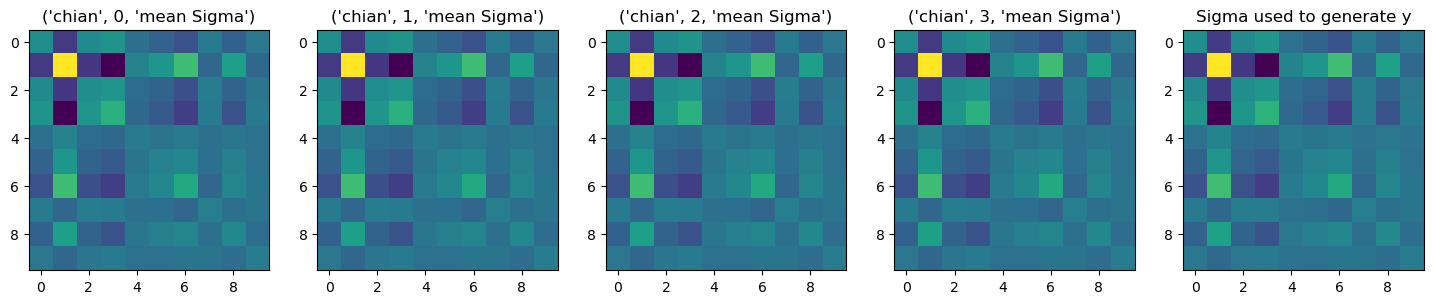

In [59]:
import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,5,figsize=(18,4)); ax[-1].imshow(a_cov); ax[-1].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain]); ax[chain].set_title(("chian",chain,"mean Sigma"))

# Homework 5: Part III

1. Go get data from kaggle.com and do a ***Bayesian Multivariate Linear Model*** analysis


<SPAN STYLE="font-size:18.0pt">

```python
import numpy as np; from scipy import stats
p=10; Psi=np.eye(p); a_cov = stats.invwishart(df=p+2, scale=Psi).rvs(1)
n=1000; y=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
# Replace this made up data with your data set from kaggle...
    
with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=np.array(0), cov=np.eye(p), shape=p); 
    y = pm.MvNormal('y', mu=mu, cov=Sigma, shape=(n,1), observed=y)
    
with MNV_LKJ    
    idata = pm.sample()
```    
</SPAN>
    
2. Choose ***priors*** that work: certainly you'll likely need to change the ***hyperparameters*** `mu` and `sigma`...

3. [Optional] Assess the performance of the MCMC and note any issue

    1. Traceplots, inference (credible) intervals, effective sample sizes, energy plots, warnings and other notes... just the usual stuff they do [here](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview)

